# Dimensionality reduction technique & clustering

In [2]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2eef5cd491ae3a9171eee4096a9910d17f7b6a3567264d7edf68e95e533da9f3
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
# Import necessary libraries
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Dimensionality reduction with UMAP
reducer = umap.UMAP()
X_reduced = reducer.fit_transform(X_scaled)



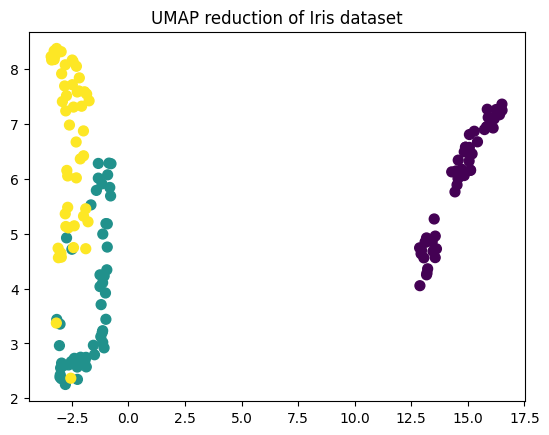

In [7]:
# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50)
plt.title('UMAP reduction of Iris dataset')
plt.show()



In [8]:
# Clustering on the reduced data
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_reduced)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


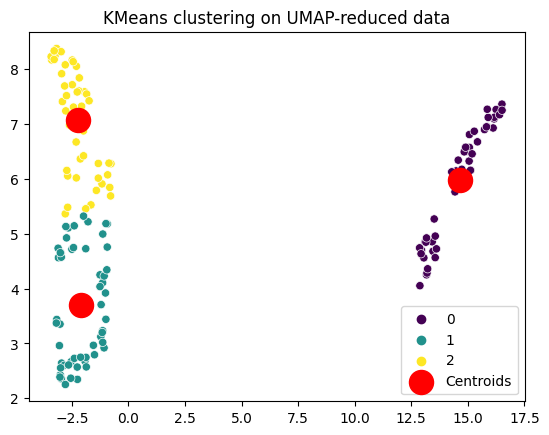

In [10]:
# Plot the clusters
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, legend='full', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans clustering on UMAP-reduced data')
plt.legend()
plt.show()


In [11]:
# Use UMAP-reduced data for classification
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


In [12]:
# Train a classifier
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)


SVC(gamma='auto')

In [13]:
# Predict on the test set
y_pred = svc.predict(X_test)


In [14]:
# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
